In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
class DistrictModel():
    def __init__(self, num_households=100):
        self.num_households = num_households
        self.households = []

        # Создание агентов
        for i in range(self.num_households):
            self.households.append(HouseholdAgent())

    def measureConsumption(self, t):
        sum = 0.0
        
        for h in self.households:
            sum += h.measureConsumption(t)

        # Trend of timeseries
        # exponential grown of electricity consumption
        multiply_factor = 1.00003
        m = pow(multiply_factor, t)
        sum *= m

        # add noise to data
        noise = np.random.normal(scale=250.0)
        sum += noise

        return sum


class HouseholdAgent():
    def __init__(self):
        electronics = []

        #electronics.append(ElectricAppliance("Light", 26.95540824, 0, 3))
        #electronics.append(ElectricAppliance("Teapot", 32.75115316, 21, 21))
        #electronics.append(ElectricAppliance("Microwave", 24.54851788, 1, 12))
        #electronics.append(ElectricAppliance("Iron", 10.85822285, 2, 9))
        #electronics.append(ElectricAppliance("Light", 28.29732032, 12, 20))
        #electronics.append(ElectricAppliance("Random", 109.5914460, 19, 24))
        #electronics.append(ElectricAppliance("Light", 7.67080034, 15, 18))
        #electronics.append(ElectricAppliance("Something", 104.90005358, 10, 20))
        #electronics.append(ElectricAppliance("Random", 23.71149643, 19, 20))
        #electronics.append(ElectricAppliance("Lamp", 188.51933973, 0, 23))

        electronics.append(ElectricAppliance("Iron", 287.2677966, 0, 0))
        electronics.append(ElectricAppliance("Iron", 251.2983050833, 1, 1))
        electronics.append(ElectricAppliance("Iron", 234.77288135, 2, 2))
        electronics.append(ElectricAppliance("Iron", 226.4745762667, 3, 3))
        electronics.append(ElectricAppliance("Iron", 223.48474575, 4, 4))
        electronics.append(ElectricAppliance("Iron", 238.0881356167, 5, 5))
        electronics.append(ElectricAppliance("Iron", 233.5728813667, 6, 6))
        electronics.append(ElectricAppliance("Iron", 233.58305085, 7, 7))
        electronics.append(ElectricAppliance("Iron", 257.47118645, 8, 8))
        electronics.append(ElectricAppliance("Iron", 290.9694915333, 9, 9))
        electronics.append(ElectricAppliance("Iron", 319.1491525333, 10, 10))
        electronics.append(ElectricAppliance("Iron", 328.3830508333, 11, 11))
        electronics.append(ElectricAppliance("Iron", 328.5152542333, 12, 12))
        electronics.append(ElectricAppliance("Iron", 335.3898305, 13, 13))
        electronics.append(ElectricAppliance("Iron", 334.4237288167, 14, 14))
        electronics.append(ElectricAppliance("Iron", 330.26440675, 15, 15))
        electronics.append(ElectricAppliance("Iron", 324.1423728833, 16, 16))
        electronics.append(ElectricAppliance("Iron", 321.7423729, 17, 17))
        electronics.append(ElectricAppliance("Iron", 405.2440678, 18, 18))
        electronics.append(ElectricAppliance("Iron", 436.3322033833, 19, 19))
        electronics.append(ElectricAppliance("Iron", 437.6542372667, 20, 20))
        electronics.append(ElectricAppliance("Iron", 420.80338985, 21, 21))
        electronics.append(ElectricAppliance("Iron", 377.1661017, 22, 22))
        electronics.append(ElectricAppliance("Iron", 326.1966101833, 23, 23))

        self.electronics = electronics
    
    def measureConsumption(self, t):
        sum = 0.0
        
        for e in self.electronics:
            sum += e.measureConsumption(t)
        
        return sum



class ElectricAppliance():

    def __init__(self, name, consumption, t0, t1):
        self.name = name
        self.consumption = consumption

        # this is time of activity of Appliance
        # another words time of turn-on and turn-off
        self.t0 = t0
        self.t1 = t1

    def measureConsumption(self, t):
        t = t % 24
        if self.t0 <= t and t <= self.t1:
            return self.consumption
        else:
            return 0.0


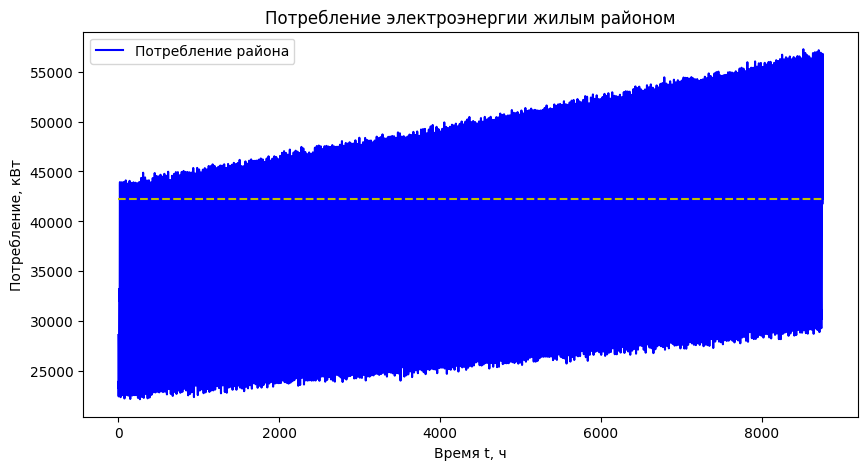

In [3]:
num_of_days = 365
T = 24 * num_of_days

time = []
output = []

dm = DistrictModel()

for t in range(T):
    cons = dm.measureConsumption(t)
    output.append(cons)
    time.append(t)


mean_cons = (np.array(cons)).mean()
plt.subplots(figsize=(10, 5))
plt.plot(time, output, c='b', label='Потребление района')
plt.plot([time[0],time[-1]], [mean_cons, mean_cons], c='y',linestyle='--')
plt.legend()
plt.title("Потребление электроэнергии жилым районом")
plt.xlabel("Время t, ч")
plt.ylabel("Потребление, кВт")
plt.show()

In [5]:
y = np.array(output)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
dt = pd.date_range("2017-01-01", periods=num_of_days * 24, freq="h")

In [10]:
df = pd.DataFrame(data={
    "Datetime" : dt,
    "PowerConsumption" : y
})

In [13]:
import csv

df.to_csv('powerconsumption_for.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

df['Datetime'] = pd.to_datetime(df['Datetime'])

In [14]:
df

,Datetime,PowerConsumption
0,2017-01-01 00:00:00,28589.999247
1,2017-01-01 01:00:00,25408.051636
2,2017-01-01 02:00:00,23273.436241
3,2017-01-01 03:00:00,22592.259574
4,2017-01-01 04:00:00,22438.058076
...,...,...
8755,2017-12-31 19:00:00,56457.313816
8756,2017-12-31 20:00:00,56798.122687
8757,2017-12-31 21:00:00,54343.433412
8758,2017-12-31 22:00:00,49054.855189
